<a href="https://colab.research.google.com/github/sartaj-sb/Tensors/blob/main/Tensor_3_mnist_convolutions_visualized.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# prompt: load the mnist dataset containing 60,000 images of 28,28 greyscale .

import tensorflow as tf

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


11490434/11490434 [==============================] - 0s 0us/step


In [2]:
x_train.shape

(60000, 28, 28)

#### Dense neural networks

In [ ]:
model  =  tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation = tf.nn.relu),
    tf.keras.layers.Dense(10,activation = tf.nn.softmax)
    ])

CNN

In [4]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64,(3,3),activation ='relu', input_shape = (28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation ='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation = 'relu'),
    tf.keras.layers.Dense(10,activation = 'softmax')
])

In [ ]:

# class myCallback (tf.keras.callbacks.Callback): ##callback class
#   def on_epoch_end(self, epoch, logs = {}):
#     if(logs.get('loss')<0.4):
#       print("\n Loss is low so cancelling training !")
#       self.model.stop_training = True

In [5]:
# prompt: create a callback class with the name mycallback class to stop training when the accuracy value is higher than 0.95

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.98):
      print("\nReached 98% accuracy so cancelling training!")
      self.model.stop_training = True


In [6]:
callbacks = myCallback()


In [ ]:
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy', metrics =['accuracy'])

In [ ]:
model.fit(x_train,y_train,epochs = 1000, callbacks=[callbacks])

Epoch 1/1000
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2601 - accuracy: 0.9251
Epoch 2/1000
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1145 - accuracy: 0.9665
Epoch 3/1000
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0783 - accuracy: 0.9764
Epoch 4/1000
1865/1875 [============================>.] - ETA: 0s - loss: 0.0596 - accuracy: 0.9816
Reached 98% accuracy so cancelling training!
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0596 - accuracy: 0.9816


In [ ]:
test_loss = model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0741 - accuracy: 0.9783


In [7]:
model2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [8]:
model2.fit(x_train,y_train,epochs=100,callbacks=[callbacks])

Epoch 1/100
1875/1875 [==============================] - 84s 44ms/step - loss: 0.1267 - accuracy: 0.9611
Epoch 2/100
1874/1875 [============================>.] - ETA: 0s - loss: 0.0416 - accuracy: 0.9871
Reached 98% accuracy so cancelling training!
1875/1875 [==============================] - 81s 43ms/step - loss: 0.0416 - accuracy: 0.9871


In [14]:
print(y_test[:100])

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9
 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9]


1/1 [==============================] - 0s 28ms/step


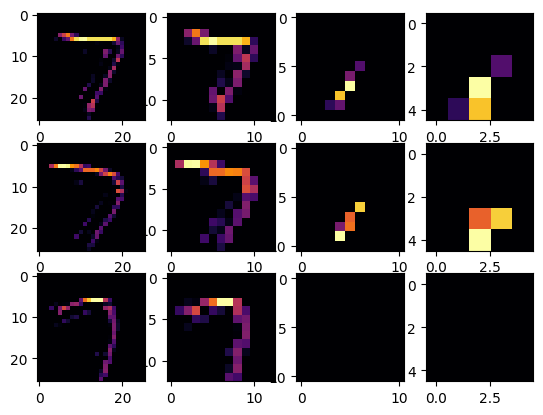

In [16]:
import matplotlib.pyplot as plt
from tensorflow.keras import models

f, axarr = plt.subplots(3,4)

FIRST_IMAGE=0
SECOND_IMAGE=17
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 1

layer_outputs = [layer.output for layer in model2.layers]
activation_model = tf.keras.models.Model(inputs = model2.input, outputs = layer_outputs)

for x in range(0,4):
  f1 = activation_model.predict(x_test[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)

  f2 = activation_model.predict(x_test[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)

  f3 = activation_model.predict(x_test[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)